#                         * *Logistic Regression - Assignment 3

**Import Packages**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline

Read the social Networks Ads CSV file.

In [2]:
os.chdir('C:\\Users\\MITALI\\Desktop\\courses\\Fall17\\Python')
ads=pd.read_csv('Social_Network_Ads.csv')

**Check head of the data**

In [3]:
ads.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


** Info of the data file**

In [4]:
ads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
User ID            400 non-null int64
Gender             400 non-null object
Age                400 non-null int64
EstimatedSalary    400 non-null int64
Purchased          400 non-null int64
dtypes: int64(4), object(1)
memory usage: 15.7+ KB


In [5]:
ads.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


**Transforming categorical variables into dummy representatives**

On observing the data, it was noticed that Gender variable could not be used as it is and would have to be transformed into a categorical variable indicator to be able to use it in Logistic Regression model. Thus variable Gdummy was created where 0=Male and 1=Female

In [3]:
df_gender=pd.get_dummies(ads['Gender'])
ads['Gdummy']=df_gender['Female']
ads.head()

,User ID,Gender,Age,EstimatedSalary,Purchased,Gdummy
0,15624510,Male,19,19000,0,0
1,15810944,Male,35,20000,0,0
2,15668575,Female,26,43000,0,1
3,15603246,Female,27,57000,0,1
4,15804002,Male,19,76000,0,0


**Checking for NULL values**

In [14]:
ads.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
Gdummy             0
dtype: int64

** Exploring Target Variable**

Once the data was in the format that could be used for further analysis, the target variable was plotted on a countplot to check if it was binary and also to understand if more users purchased it than not purchasing it.

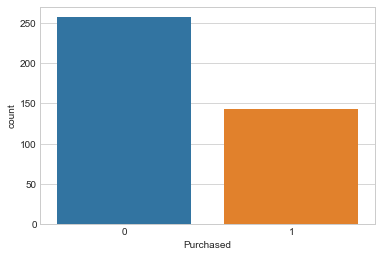

In [9]:
sns.set_style('whitegrid')
sns.countplot(x='Purchased',data=ads)

** Exploring Data**

Plot to understand distribution of ages of customer

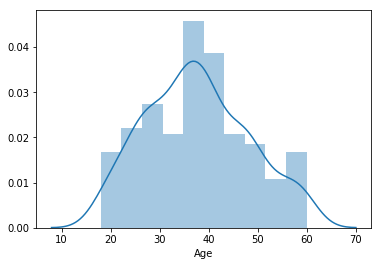

In [72]:
sns.distplot(ads['Age'])

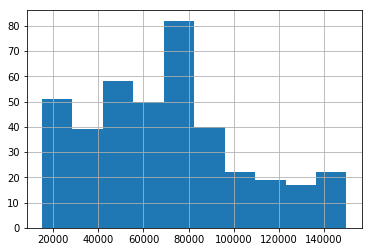

In [73]:
ads['EstimatedSalary'].hist()

Below plot explaines at what age do customers tend to Purchase more

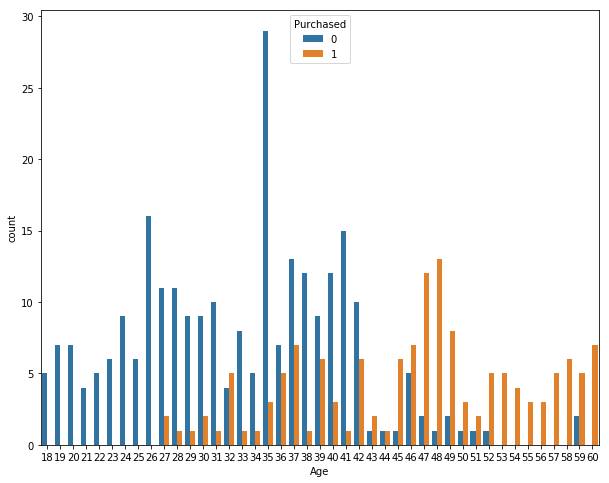

In [79]:
fig1=sns.countplot(x='Age',hue='Purchased',data=ads)
fig1.figure.set_size_inches(10,8)

Below plot was to understand trends between ages and estimated salaries of customers

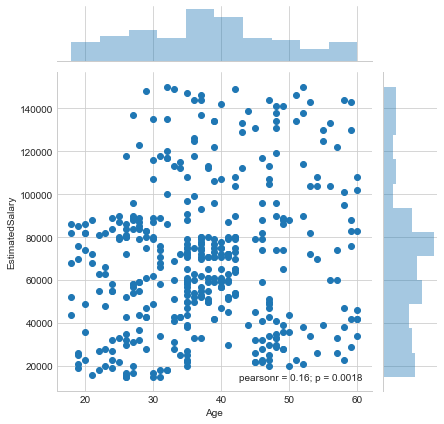

In [18]:
sns.jointplot(x='Age',y='EstimatedSalary',data=ads)

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116]),
 <a list of 117 Text xticklabel objects>)

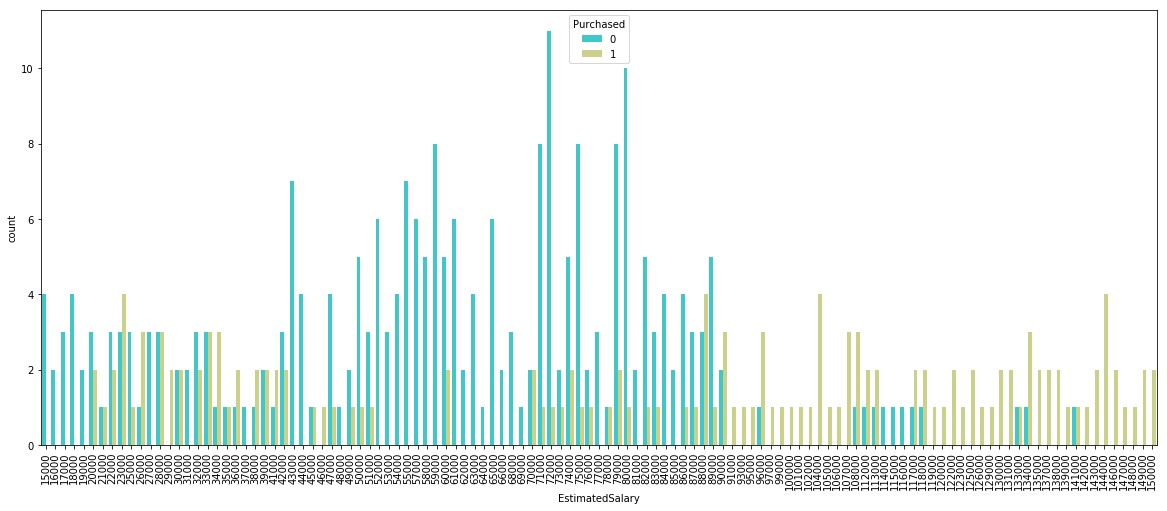

In [86]:
fig2=sns.countplot(x='EstimatedSalary',hue='Purchased',data=ads,palette='rainbow')
fig2.figure.set_size_inches(20,8)
plt.xticks(rotation=90)

**To interpret the interdependnce of variables on each other**

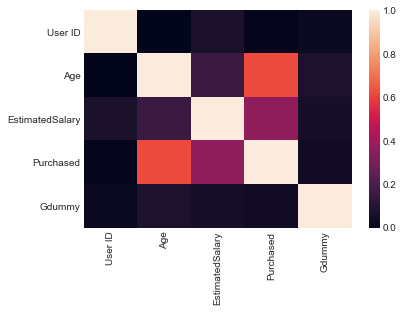

In [12]:
sns.heatmap(ads.corr())

** Fianlly a pairplot was created**

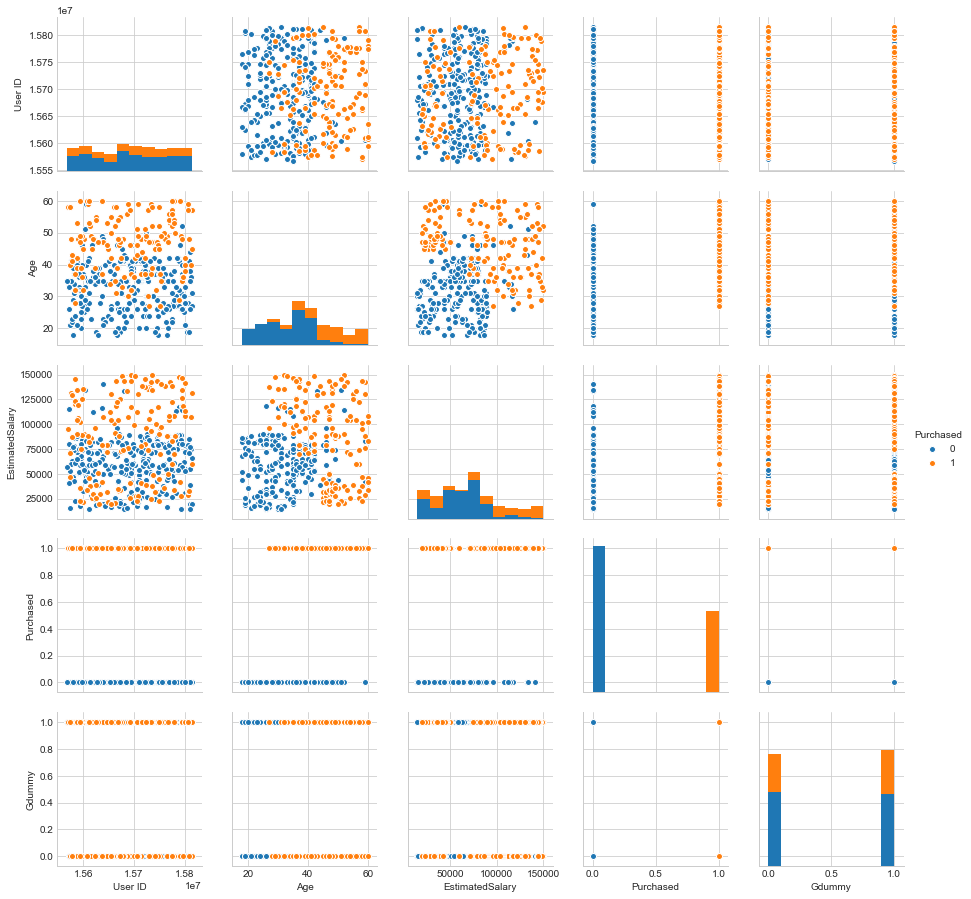

In [10]:
sns.pairplot(ads,hue='Purchased')

**Tranformation**

To improve the performance of the model, Estimated_Salary variable was log transformed

In [113]:
ads['log_salary']=np.log(ads["EstimatedSalary"])
ads.head()

,User ID,Gender,Age,EstimatedSalary,Purchased,Gdummy,log_salary
0,15624510,Male,19,19000,0,0,9.852194
1,15810944,Male,35,20000,0,0,9.903488
2,15668575,Female,26,43000,0,1,10.668955
3,15603246,Female,27,57000,0,1,10.950807
4,15804002,Male,19,76000,0,0,11.238489


# Splitting the data

In [114]:
from sklearn.model_selection import train_test_split

In [118]:
X=ads[['Age','log_salary','Gdummy']]
Y=ads[['Purchased']]

** Split the data into training and testing data using train_test_split**

In [119]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.40, random_state=101)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000F63456E7F0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000F634686320>]], dtype=object)

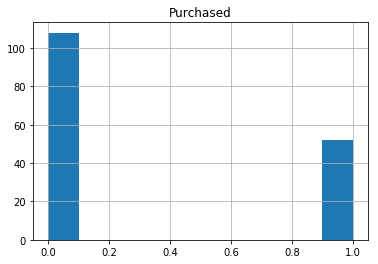

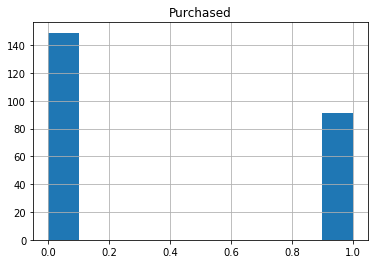

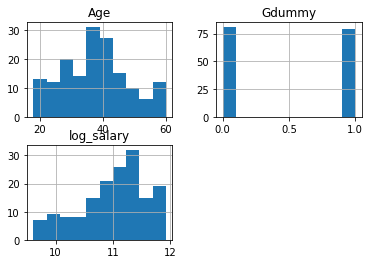

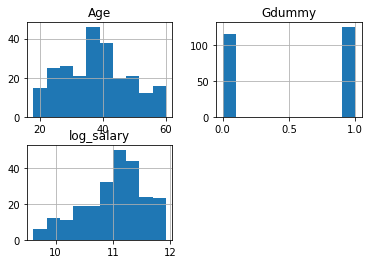

In [120]:
Y_test.hist()
Y_train.hist()
X_test.hist()
X_train.hist()

** Train and fit a logistic regression model on the training dataset**

In [121]:
from sklearn.linear_model import LogisticRegression

In [122]:
logmod=LogisticRegression()
logmod.fit(X_train,Y_train)

C:\Users\MITALI\Anaconda3\lib\site-packages\sklearn\utils\validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

# Predictions and Evaluations

In [123]:
predictions=logmod.predict(X_test)

The coef_ function determines the coefficient of each variable which also explains the way they are related to the target variable.

In [124]:
print(logmod.coef_)

[[ 0.16105769 -0.47380631 -0.04535473]]


From the above output, it was seen that the EstimatedSalary and Gender of customers are negatively correlated whereas the Age of the customer is positively correlated to the fact if they Purchase looking at the Ad or not

In [125]:
logmod.score(X_train,Y_train)

0.80000000000000004

Accuracy of the trained model is 80%

# Classification Report

In [126]:
from sklearn.metrics import classification_report

In [127]:
print(classification_report(Y_test,predictions))

             precision    recall  f1-score   support

          0       0.86      0.91      0.88       108
          1       0.78      0.69      0.73        52

avg / total       0.83      0.84      0.83       160



From the above output, precision of the Regression model was 83%

** Confusion Matrix**

In [128]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(Y_test,predictions))

[[98 10]
 [16 36]]


Results from confusion matrix determine that 98 and 36 are the number of correct predictions and 16 and 10 are the number of incorrect predictions.

# Conclusion

The above designed model would correctly predict if the customer would buy the product after looking at the add 83% of the time. The confusion matrix above depicts that the precision of the model is pretty good as TrueNegatives and FalsePositives are lower than the TruePositives and FalseNegatives. 